In [4]:

pred= model.predict(X_val,batch_size =512)

In [3]:
# -*- coding: utf-8 -*-
#import matplotlib.pyplot as plt
import numpy as np
import gzip
import keras

from keras.layers import Input



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
#%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau



#https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
model = Sequential()
Input 
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



batch_size = 64



model.load_weights('mnist.h5') #trained with astar super computer for 30mins

X_train = mnist.train.images
X_train = np.reshape(X_train,(X_train.shape[0],28,28,1))
X_val = mnist.test.images
X_val = np.reshape(X_val,(X_val.shape[0],28,28,1))[::1]
y_train = mnist.train.labels
y_val = mnist.test.labels[::1]




Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [250]:
dictt = np.load('dictt_BetterSampling_mnist.npy').item()

In [123]:
map(np.std,phi)

[1.0, 1.0, 1.0, 1.0, 0.99999994, 1.0, 0.99999994, 0.99999994, 1.0, 0.99999994]

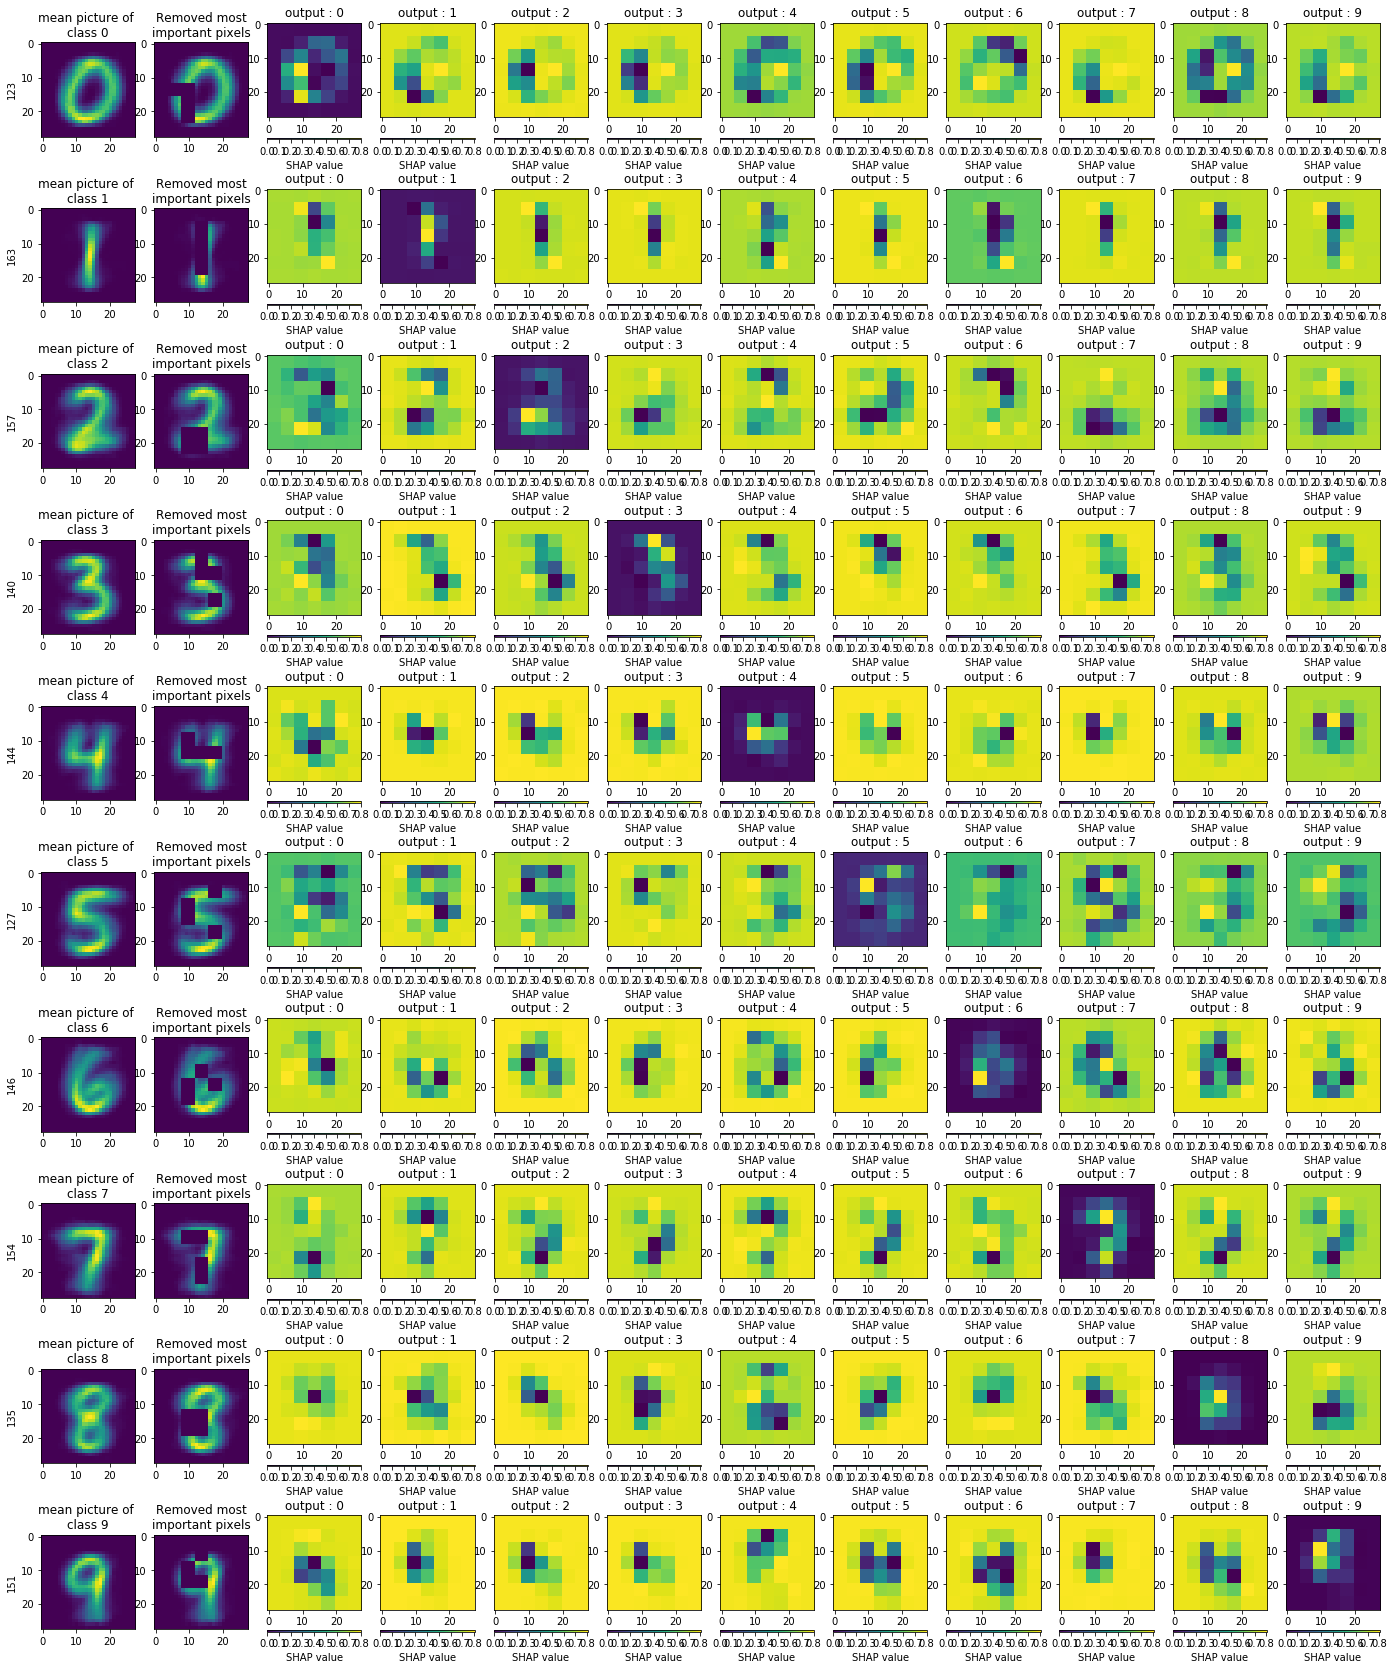

In [176]:
f,ax = plt.subplots(10,12,figsize=(12*2,5*6))

for digit in range(10):
    all_pic = np.stack([dictt[x][0][:,:,0] for x in dictt.keys() 
                  if (np.argmax(dictt[x][-1]) == digit and 
                    np.sum(np.isnan(np.stack(dictt[x][1],0)))==0)],0)
    avg_pic = np.mean(all_pic,0)
    ax[digit,0].imshow(avg_pic,plt.cm.viridis)
    ax[digit,0].set_title('mean picture of \nclass %s'%digit)
    ax[digit,0].set_ylabel(len(all_pic))
    a = np.stack([np.stack(dictt[x][1],0) for x in dictt.keys() 
                  if (np.argmax(dictt[x][-1]) == digit and 
                    np.sum(np.isnan(np.stack(dictt[x][1],0)))==0)],0)
    phi = np.mean(a,(0))
    phi = (phi - np.stack([np.mean(phi,-1),],-1))/np.stack([np.std(phi,-1),],-1)
    for preds in range(0,10):
        shapley_image = np.copy(dictt[0][2].astype(np.float32))
        for x in range(28):
            for y in range(28):
                shapley_image[x,y] = phi[preds][int(shapley_image[x,y])]
        ax[digit,preds+2].imshow(shapley_image,plt.cm.viridis)
        ax[digit,preds+2].set_title('output : %s' %preds)
        cb = plt.colorbar(cax,  ax=ax[digit,preds+2], label="SHAP value", orientation="horizontal", 
                          aspect=70,cmap=plt.cm.viridis) 
        if preds == digit:
            largest_shap_val = np.percentile(np.concatenate(shapley_image),90)
            avg_pic[shapley_image > largest_shap_val] = 0 
            ax[digit,1].imshow(avg_pic)
            ax[digit,1].set_title('Removed most\nimportant pixels')
plt.show()
    
    


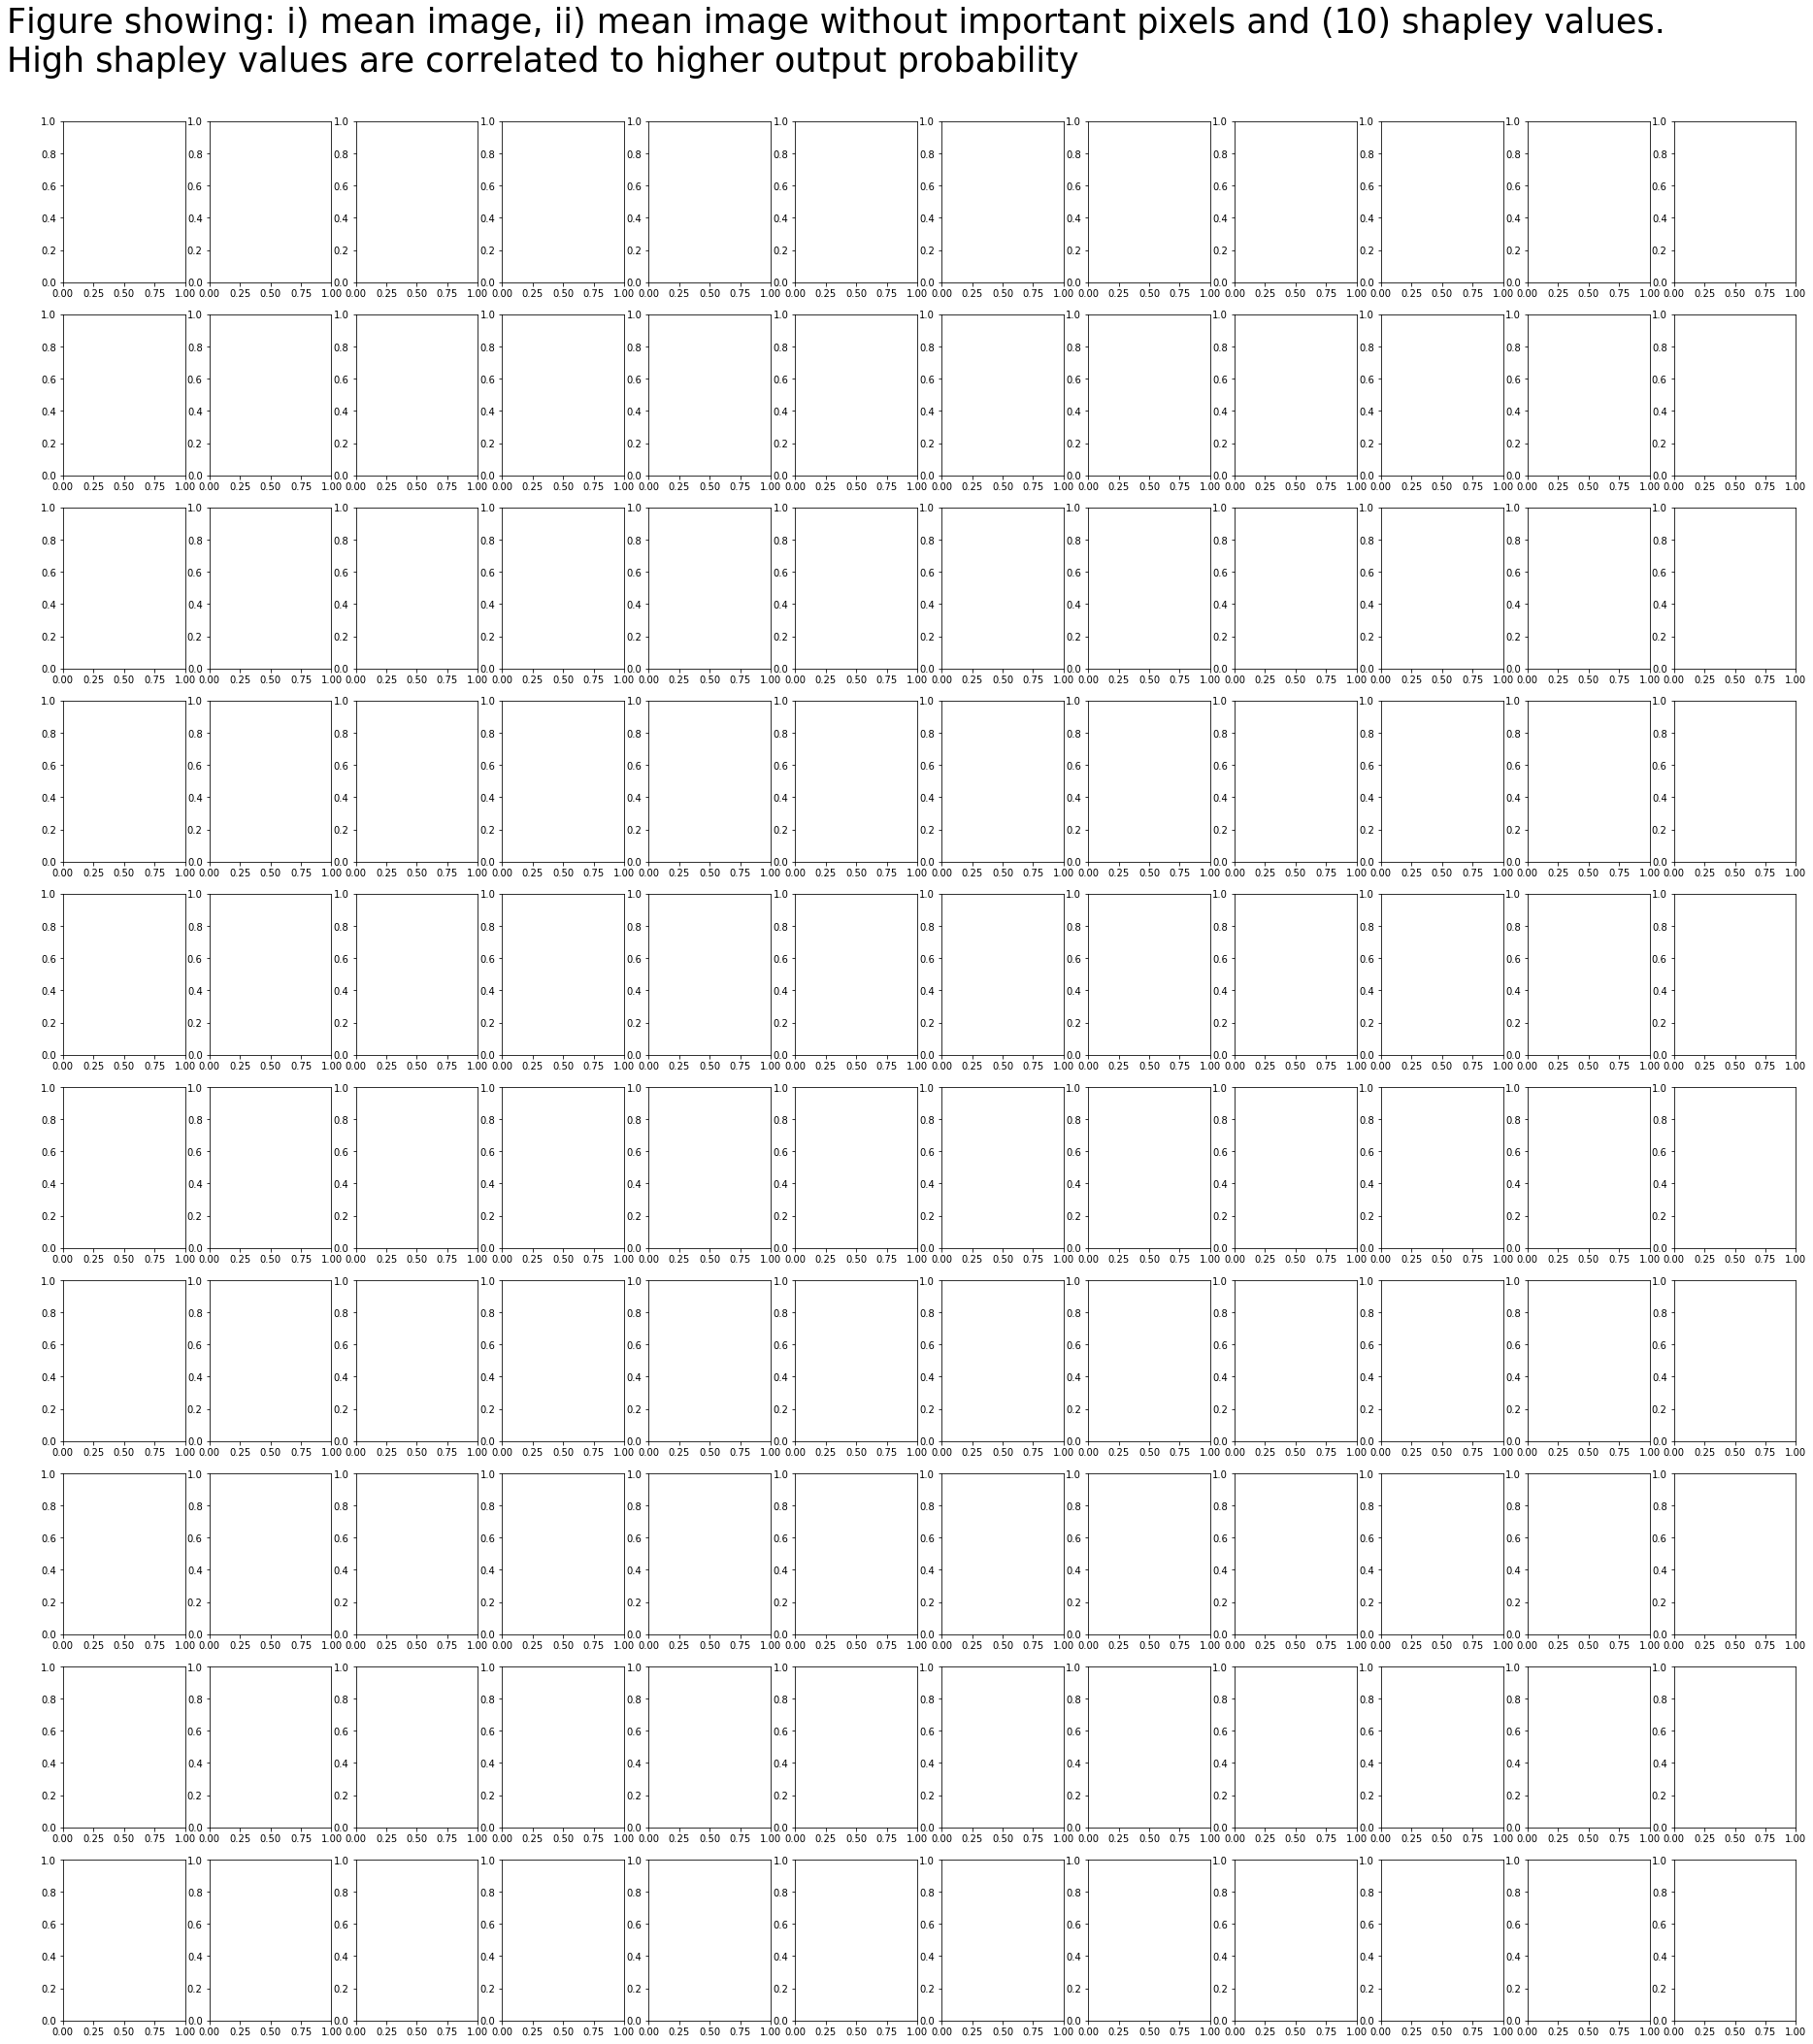

In [246]:
f,ax = plt.subplots(10,12,figsize=(16*2,2*18))
plt.figtext(0.10, 0.90, 'Figure showing: i) mean image, ii) mean image without important pixels and shapley values. \nHigh shapley values are correlated to higher output probability', 
            horizontalalignment='left',fontsize=35) 
plt.show()

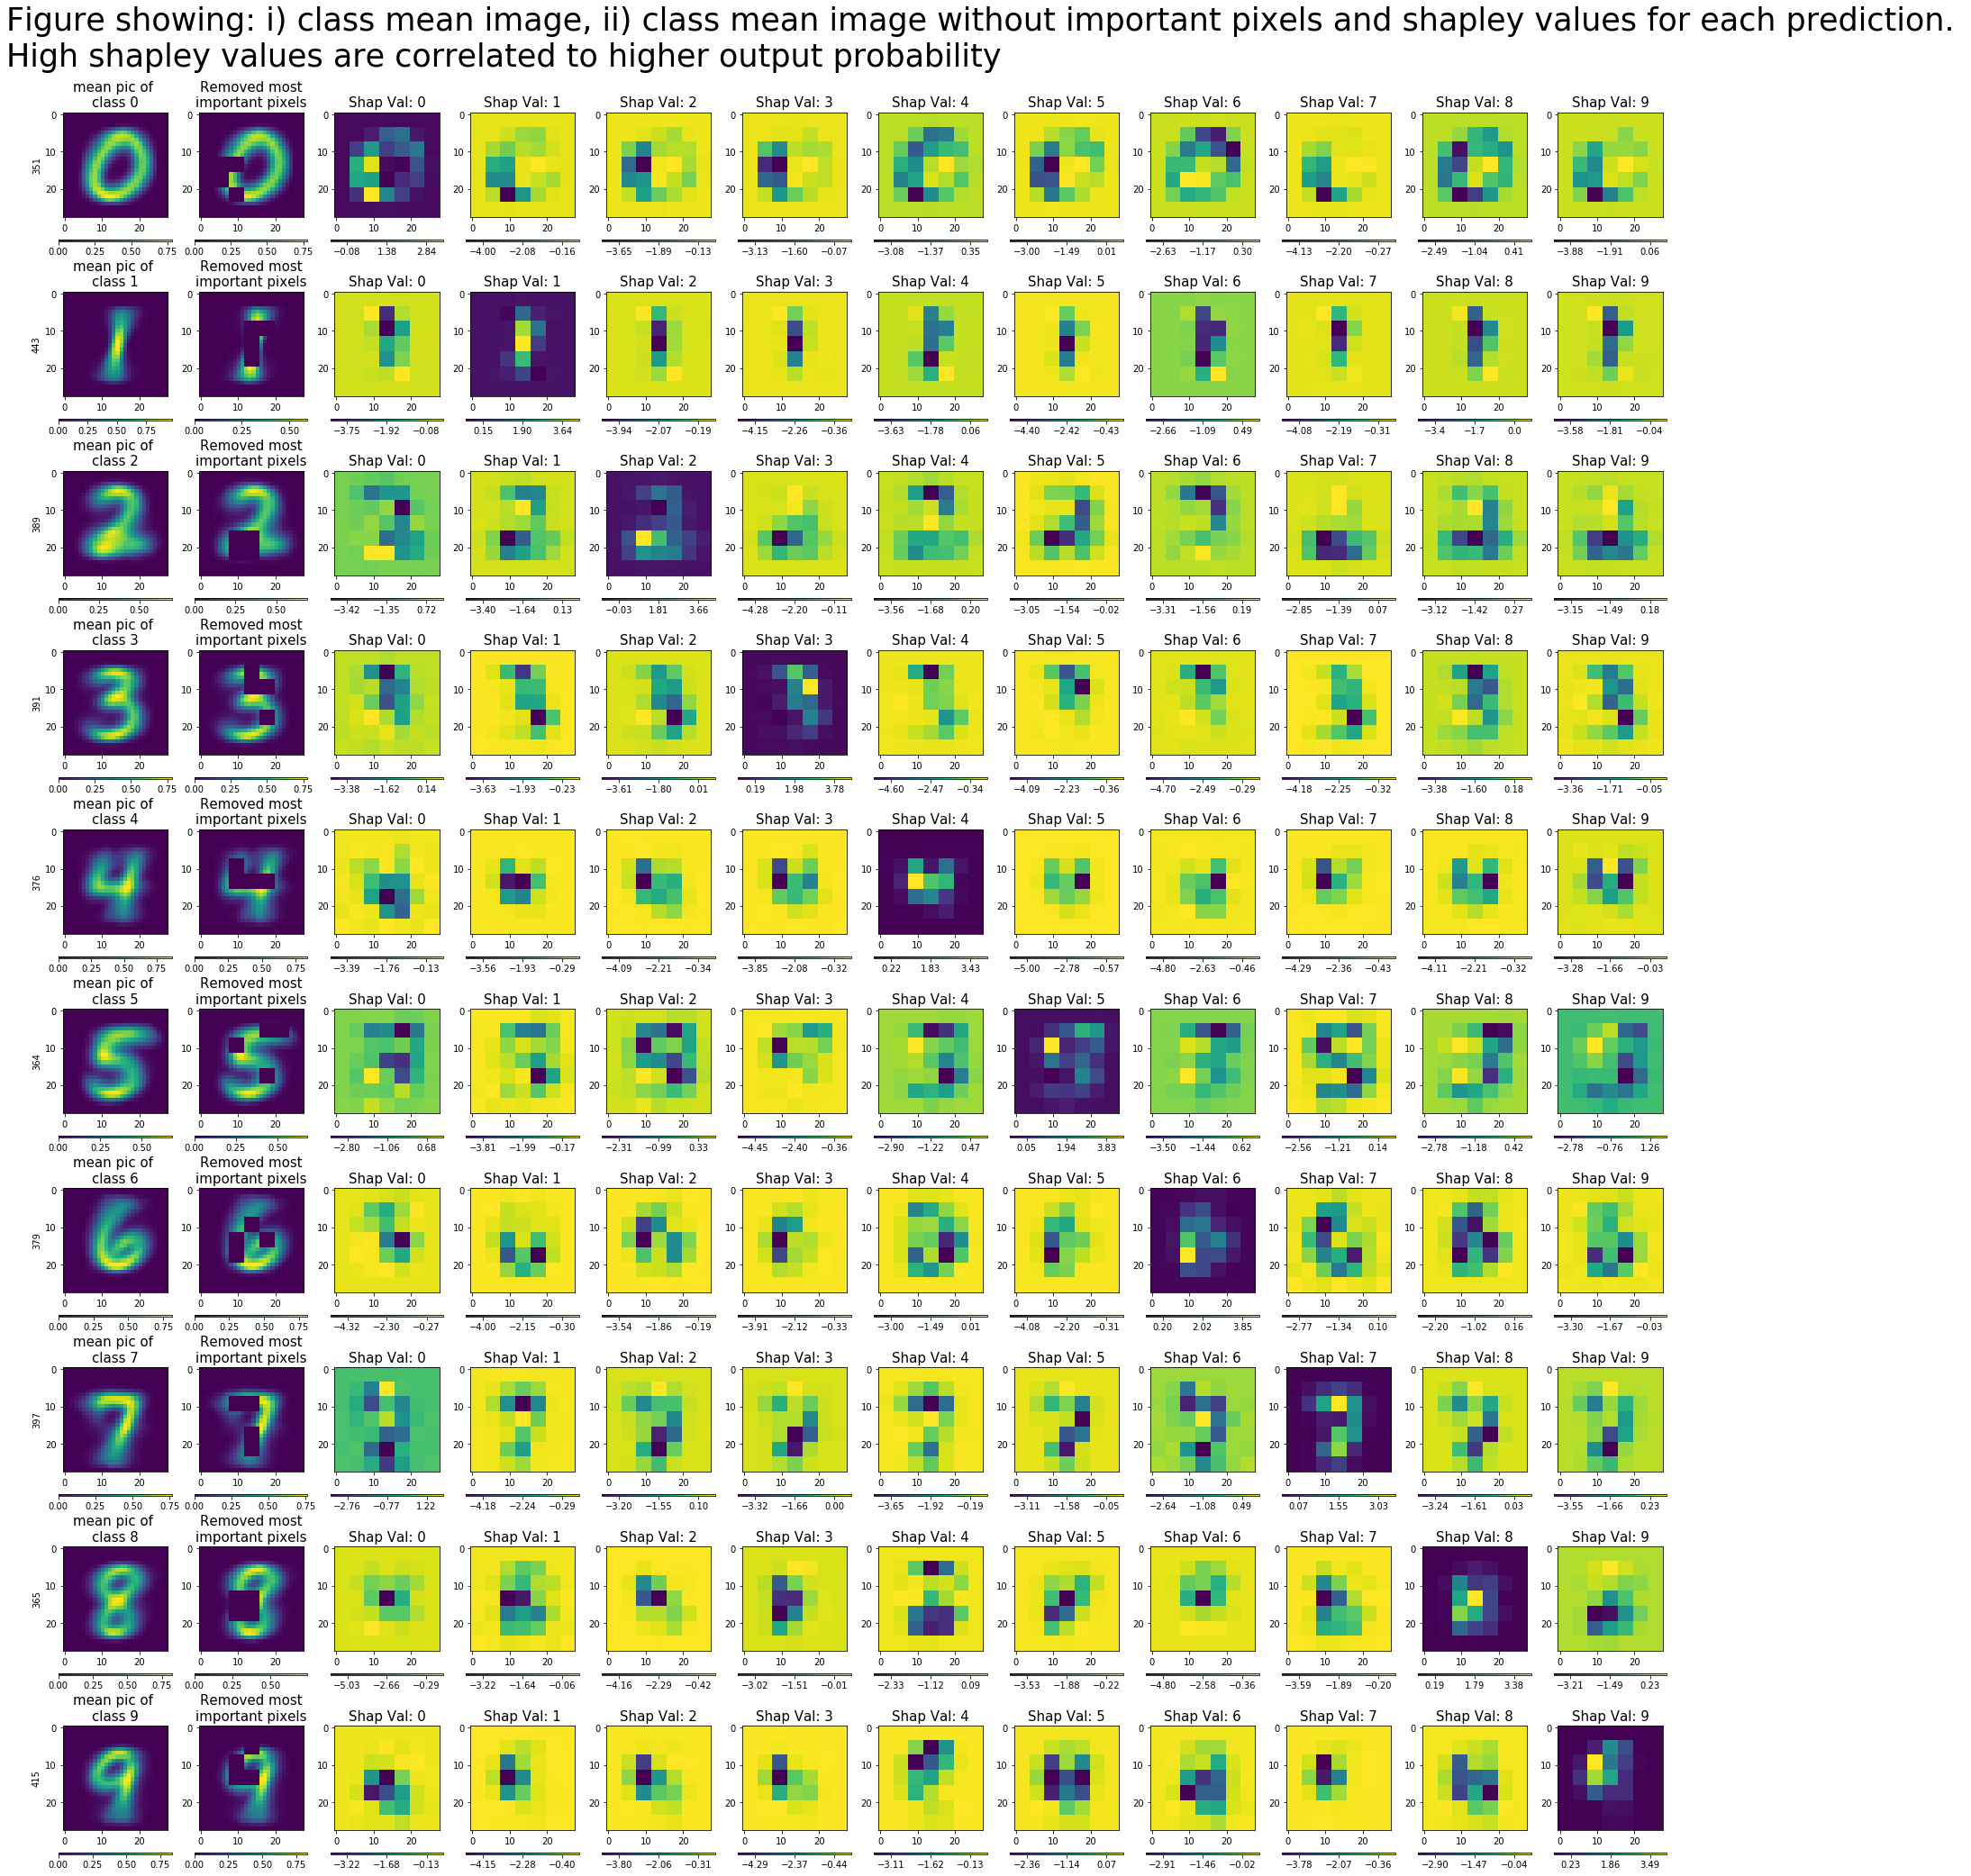

In [251]:
fontsize = 15
f,ax = plt.subplots(10,12,figsize=(16*2,2*18))
plt.figtext(0.10, 0.90, 'Figure showing: i) class mean image, ii) class mean image without important pixels and shapley values for each prediction. \nHigh shapley values are correlated to higher output probability', 
            horizontalalignment='left',fontsize=35) 
for digit in range(10):
    all_pic = np.stack([dictt[x][0][:,:,0] for x in dictt.keys() 
                  if (np.argmax(dictt[x][-1]) == digit and 
                    np.sum(np.isnan(np.stack(dictt[x][1],0)))==0)],0)
    avg_pic = np.mean(all_pic,0)
    cax = ax[digit,0].imshow(avg_pic,cmap = plt.cm.viridis)
    cb = plt.colorbar(cax,  ax=ax[digit,0],ticks=[0,.25,.5,.75], orientation="horizontal", aspect=70) 
    ax[digit,0].set_title('mean pic of \nclass %s'%digit,fontsize=fontsize)
    ax[digit,0].set_ylabel(len(all_pic))
    a = np.stack([np.stack(dictt[x][1],0) for x in dictt.keys() 
                  if (np.argmax(dictt[x][-1]) == digit and 
                    np.sum(np.isnan(np.stack(dictt[x][1],0)))==0)],0)
    phi = np.mean(a,(0))
    phi = (phi - np.stack([np.mean(phi,-1),],-1))/np.stack([np.std(phi,-1),],-1)
    for preds in range(0,10):
        shapley_image = np.copy(dictt[0][2].astype(np.float32))
        for x in range(28):
            for y in range(28):
                shapley_image[x,y] = phi[preds][int(shapley_image[x,y])]
        min_val = np.min(phi[preds])
        max_val = np.max(phi[preds])
        cax = ax[digit,preds+2].imshow(shapley_image,vmin=min_val, vmax=max_val,cmap = plt.cm.viridis)
        ax[digit,preds+2].set_title('Shap Val: %s' %preds,fontsize=fontsize)
        max_minus_min_Phi = max_val-min_val
        cb = plt.colorbar(cax,  ax=ax[digit,preds+2],
                          ticks=map(lambda x : np.round(x,2),
                                [(max_val+min_val)*.5 - .35*max_minus_min_Phi,
                                 (max_val+min_val)*.5,
                                 (max_val+min_val)*.5 + .35*max_minus_min_Phi]), 
                          orientation="horizontal", aspect=70) 
        if preds == digit:
            largest_shap_val = np.percentile(np.concatenate(shapley_image),90)
            avg_pic[shapley_image > largest_shap_val] = 0 
            cax = ax[digit,1].imshow(avg_pic,cmap = plt.cm.viridis)
            ax[digit,1].set_title('Removed most\nimportant pixels',fontsize=fontsize)
            cb = plt.colorbar(cax,  ax=ax[digit,1],ticks=[0,.25,.5,.75], orientation="horizontal", aspect=70) 
plt.savefig('Visual.png',dpi=200, bbox_inches='tight')
plt.show()
    
    


In [227]:
phi[-1][phi[-1] > 0]

array([0.24627455, 2.45054   , 0.4900605 , 4.0885954 , 1.2093645 ,
       0.49882945, 0.06949905, 3.4408293 , 2.1211882 , 0.940791  ,
       0.1090466 , 0.10893936], dtype=float32)

In [228]:
for i in range(10):
    print np.corrcoef(phi[i][phi[-1] > 0],phi[-1][phi[-1] > 0])

[[ 1.         -0.09867489]
 [-0.09867489  1.        ]]
[[ 1.         -0.77508506]
 [-0.77508506  1.        ]]
[[ 1.         -0.75213043]
 [-0.75213043  1.        ]]
[[ 1.         -0.75507701]
 [-0.75507701  1.        ]]
[[ 1.         -0.66382288]
 [-0.66382288  1.        ]]
[[ 1.        -0.4382213]
 [-0.4382213  1.       ]]
[[1.         0.05825872]
 [0.05825872 1.        ]]
[[ 1.         -0.85792235]
 [-0.85792235  1.        ]]
[[ 1.         -0.34471469]
 [-0.34471469  1.        ]]
[[1. 1.]
 [1. 1.]]


In [213]:
a[0,-1,:]

array([-0.73171854, -0.7399667 , -0.74013066, -0.7405438 , -0.7415873 ,
       -0.7410299 , -0.7405798 , -0.7327563 , -0.73321354, -0.73055965,
       -0.37776646,  0.8054698 , -0.9270467 , -0.7430778 , -0.7418539 ,
       -0.7391066 ,  7.864178  ,  4.179266  ,  0.94005895, -1.1672472 ,
       -0.74177396, -0.72855324, -0.7477331 , 14.845335  ,  2.0392065 ,
        0.89806205, -0.74714357, -0.72958654, -0.7448326 , -0.74486613,
        4.2241225 ,  0.11455129,  0.97917974, -0.7225513 , -0.74750787,
       -0.74769026, -0.7216609 , -0.74659956,  2.1819453 , -1.0962828 ,
       -0.74795705, -0.74728143, -0.71954185, -0.7477705 , -0.74838716,
        0.16223557, -0.7469357 , -0.7471598 , -0.7188364 ], dtype=float32)

array([[1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0

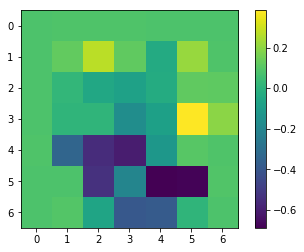

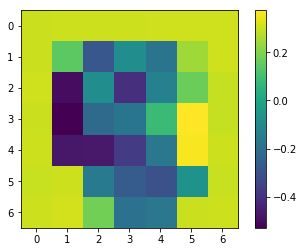

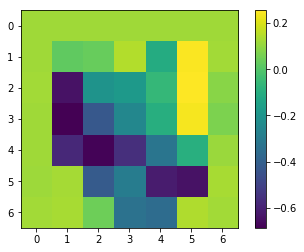

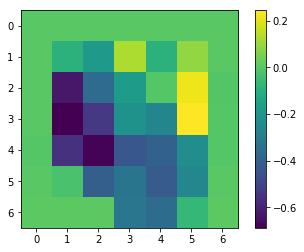

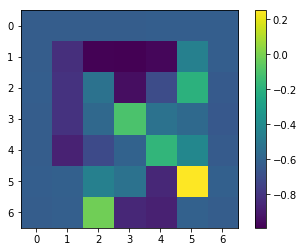

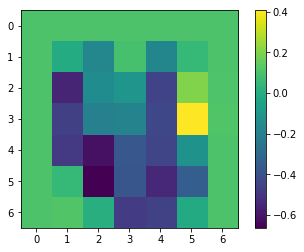

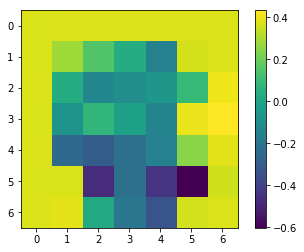

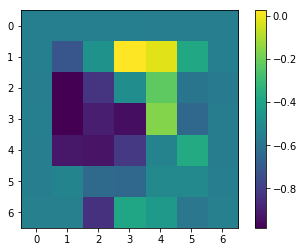

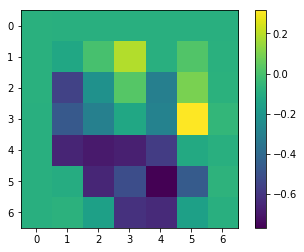

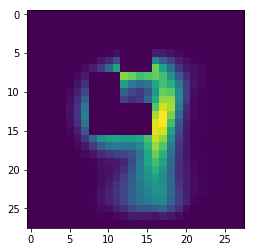

In [237]:
a = np.stack([np.stack(dictt[x][1],0) for x in dictt.keys() 
                  if (np.argmax(dictt[x][-1]) == 9 and 
                    np.sum(np.isnan(np.stack(dictt[x][1],0)))==0)],0)



for digit in range(9):
    counter = 0
    img = np.zeros((7,7))
    for i in range(7):
        for j in range(7):
            img[i,j] = np.corrcoef(a[:,9,counter],a[:,digit,counter])[0,1]
            counter += 1
    cax = plt.imshow(img)
    cb = plt.colorbar(cax)
    plt.set_title()
    plt.show()
plt.imshow(avg_pic)
plt.show()